## Classify devnagari script

Dataset : https://www.kaggle.com/ashokpant/devanagari-character-dataset-large#dhcd.rar

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
path = Path('/home/jupyter/my_data/devanagari')

In [4]:
path.ls()

['test', 'train']

In [10]:
fnames = get_image_files(path/'test/0')
fnames[:5]

[PosixPath('/home/jupyter/my_data/devanagari/test/0/22763.png'),
 PosixPath('/home/jupyter/my_data/devanagari/test/0/66648.png'),
 PosixPath('/home/jupyter/my_data/devanagari/test/0/89418.png'),
 PosixPath('/home/jupyter/my_data/devanagari/test/0/53062.png'),
 PosixPath('/home/jupyter/my_data/devanagari/test/0/39413.png')]

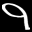

In [13]:
open_image('/home/jupyter/my_data/devanagari/test/1/12405.png')

In [20]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, train='train', valid='test', test='test', ds_tfms=tfms, size=32)

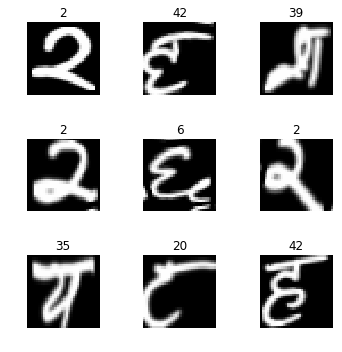

In [21]:
data.show_batch(rows=3, figsize=(5,5))

This dataset doesn't have all the characters from hindi. Swar (स्वर/ Vowell) are not included in the dataset.

Swar: अ, आ, इ, ई, ..etc

In [22]:
learn = ConvLearner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Total time: 02:30
epoch  train loss  valid loss  accuracy
1      0.779066    0.411839    0.874203  (01:15)
2      0.487299    0.228237    0.929420  (01:15)



Lets try to train more for 4 more cycle.

In [23]:
learn.fit_one_cycle(4)

Total time: 05:03
epoch  train loss  valid loss  accuracy
1      0.374066    0.191954    0.942609  (01:15)
2      0.356936    0.153535    0.953696  (01:15)
3      0.268126    0.124676    0.961522  (01:16)
4      0.241137    0.113157    0.965217  (01:15)



The accuracy is not increasing after 96%. Lets train all layer by unfreezing them.

In [24]:
learn.unfreeze()
learn.fit_one_cycle(4)

Total time: 05:19
epoch  train loss  valid loss  accuracy
1      0.296319    0.416867    0.877681  (01:19)
2      0.171613    0.076787    0.978043  (01:19)
3      0.083150    0.039324    0.988768  (01:19)
4      0.038879    0.023761    0.993116  (01:20)



This gives error rate of 0.6884(100-99.3116). Lets save this model

In [25]:
learn.save('devanagari_1')